# Customer Check-In Prediction

<u>Problem Statement</u> : To predict the customer who is going to check-in into the hotel using the history of customer booking in a hotel.

In [2]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# importing dataset
df = pd.read_csv('train_data_evaluation_part_2.csv')

In [4]:
df.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Removing the unnamed columns as it is not necesary.
data = df.drop('Unnamed: 0',axis=1)

In [6]:
#Removing the unnamed columns as it is not necesary.
data = data.drop('ID',axis=1)

In [7]:
data.shape

(82580, 28)

In [8]:
# Basic data check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           82580 non-null  object 
 1   Age                   78834 non-null  float64
 2   DaysSinceCreation     82580 non-null  int64  
 3   AverageLeadTime       82580 non-null  int64  
 4   LodgingRevenue        82580 non-null  float64
 5   OtherRevenue          82580 non-null  float64
 6   BookingsCanceled      82580 non-null  int64  
 7   BookingsNoShowed      82580 non-null  int64  
 8   BookingsCheckedIn     82580 non-null  int64  
 9   PersonsNights         82580 non-null  int64  
 10  RoomNights            82580 non-null  int64  
 11  DaysSinceLastStay     82580 non-null  int64  
 12  DaysSinceFirstStay    82580 non-null  int64  
 13  DistributionChannel   82580 non-null  object 
 14  MarketSegment         82580 non-null  object 
 15  SRHighFloor        

Age Column is having some missing values

In [9]:
# Handling missing data
data = data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78834 entries, 0 to 82579
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           78834 non-null  object 
 1   Age                   78834 non-null  float64
 2   DaysSinceCreation     78834 non-null  int64  
 3   AverageLeadTime       78834 non-null  int64  
 4   LodgingRevenue        78834 non-null  float64
 5   OtherRevenue          78834 non-null  float64
 6   BookingsCanceled      78834 non-null  int64  
 7   BookingsNoShowed      78834 non-null  int64  
 8   BookingsCheckedIn     78834 non-null  int64  
 9   PersonsNights         78834 non-null  int64  
 10  RoomNights            78834 non-null  int64  
 11  DaysSinceLastStay     78834 non-null  int64  
 12  DaysSinceFirstStay    78834 non-null  int64  
 13  DistributionChannel   78834 non-null  object 
 14  MarketSegment         78834 non-null  object 
 15  SRHighFloor        

In [11]:
data.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,JPN,54.0,1095,58,230.0,24.0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0


### Setting up label

    BookingsCheckedIn = 1 implies that Customer will check into the hotel
    BookingsCheckedIn = 0 implies that Customer will not check into the hotel

In [12]:
data['BookingsCheckedIn'].unique()

array([ 3,  0,  1,  9, 11,  2,  7,  8,  5,  6,  4, 66, 15, 29, 25, 10, 17,
       13, 26, 23, 12, 57, 40, 18, 14, 24, 20, 34], dtype=int64)

In [13]:
data['BookingsCheckedIn'] = data['BookingsCheckedIn'].replace([3,9,11,2,7,8,5,6,4,66,15,29,25,10,17,13,26,23,12,57,40,18,18,14,24,20,34],1)

In [14]:
data.head(10)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.0,150,45,371.0,105.3,1,0,1,8,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,JPN,54.0,1095,58,230.0,24.0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0
6,JPN,49.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,FRA,32.0,1095,38,535.0,94.0,0,0,1,10,...,0,0,0,0,1,0,0,0,0,0
8,FRA,42.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,IRL,25.0,1095,96,174.0,69.0,0,0,1,6,...,0,0,0,0,0,0,0,0,0,0
10,IRL,27.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Number Of Bookings Checked in')

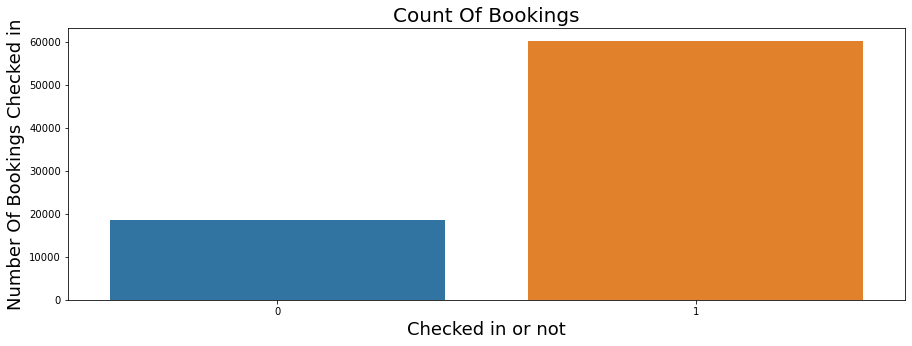

In [15]:
# Count Plot
plt.figure(figsize=(15,5))
sns.countplot(x='BookingsCheckedIn',data=data)
plt.title("Count Of Bookings",fontsize=20)
plt.xlabel("Checked in or not",fontsize=18)
plt.ylabel("Number Of Bookings Checked in",fontsize=18)

In [16]:
# Percentage of values in each category
print("Percent Of Bookings Checked In:{:.2f} %".format(len(data[data['BookingsCheckedIn']==1])/len(data['BookingsCheckedIn'])*100))
print("Percent Of Bookings not Checked In:{:.2f} %".format(len(data[data['BookingsCheckedIn']==0])/len(data['BookingsCheckedIn'])*100))

Percent Of Bookings Checked In:76.44 %
Percent Of Bookings not Checked In:23.56 %


There is a class imbalance:

    1. 76% of data belongs to class 1
    2. 23% of data belongs to class 0

### Data Preprocessing

In [17]:
from tqdm import tqdm
preprocessed_DistributionChannel = []
# tqdm is for printing the status bar
for sentance in tqdm(data['DistributionChannel'].values):
    sentance = sentance.replace('/', '_')
    sentance = sentance.replace(' ', '_')
    preprocessed_DistributionChannel.append(sentance.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 78834/78834 [00:00<00:00, 523485.35it/s]


In [18]:
set(preprocessed_DistributionChannel)

{'corporate', 'direct', 'electronic_distribution', 'travel_agent_operator'}

In [19]:
data['DistributionChannel']=preprocessed_DistributionChannel

In [20]:
data['DistributionChannel'].head()

0                corporate
2    travel_agent_operator
3    travel_agent_operator
4    travel_agent_operator
5    travel_agent_operator
Name: DistributionChannel, dtype: object

In [21]:
data['DistributionChannel']=data['DistributionChannel'].replace({'corporate':0, 'direct':1, 'electronic_distribution':2, 
                                                                 'travel_agent_operator':3})


In [22]:
data['DistributionChannel'].head()

0    0
2    3
3    3
4    3
5    3
Name: DistributionChannel, dtype: int64

In [23]:
from tqdm import tqdm
preprocessed_MarketSegment = []
# tqdm is for printing the status bar
for sentance in tqdm(data['MarketSegment'].values):
    sentance = sentance.replace('/', '_')
    sentance = sentance.replace(' ', '_')
    preprocessed_MarketSegment.append(sentance.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 78834/78834 [00:00<00:00, 627316.98it/s]


In [24]:
set(preprocessed_MarketSegment)

{'aviation',
 'complementary',
 'corporate',
 'direct',
 'groups',
 'other',
 'travel_agent_operator'}

In [25]:
data['MarketSegment']=preprocessed_MarketSegment

In [26]:
data['MarketSegment']=data['MarketSegment'].replace({'aviation':0, 'complementary':1, 'corporate':2, 
                                                    'direct':3, 'groups':4, 'other':5, 'travel_agent_operator':6})

In [27]:
nationality_dict= dict.fromkeys(set(data['Nationality']),0)

In [28]:
nationality_dict=dict()
label=0
for i in  set(data['Nationality']):
    nationality_dict[i]=label
    label+=1

In [29]:
nationality_dict

{'SLV': 0,
 'PER': 1,
 'SWE': 2,
 'LVA': 3,
 'MLI': 4,
 'SRB': 5,
 'LBY': 6,
 'USA': 7,
 'TWN': 8,
 'AUS': 9,
 'THA': 10,
 'NGA': 11,
 'MDV': 12,
 'SVN': 13,
 'NLD': 14,
 'PHL': 15,
 'GBR': 16,
 'SUR': 17,
 'CAN': 18,
 'SDN': 19,
 'MDG': 20,
 'CZE': 21,
 'KIR': 22,
 'FJI': 23,
 'QAT': 24,
 'RWA': 25,
 'SGP': 26,
 'NCL': 27,
 'SOM': 28,
 'POL': 29,
 'MRT': 30,
 'KOR': 31,
 'BWA': 32,
 'NZL': 33,
 'JOR': 34,
 'ETH': 35,
 'RUS': 36,
 'GIN': 37,
 'COM': 38,
 'DOM': 39,
 'SMR': 40,
 'PRI': 41,
 'SWZ': 42,
 'ZAF': 43,
 'URY': 44,
 'IRQ': 45,
 'ATF': 46,
 'SLE': 47,
 'ITA': 48,
 'JAM': 49,
 'GEO': 50,
 'CHN': 51,
 'MAR': 52,
 'BRA': 53,
 'VEN': 54,
 'UGA': 55,
 'ROU': 56,
 'ARE': 57,
 'PCN': 58,
 'TKM': 59,
 'ISL': 60,
 'ERI': 61,
 'AZE': 62,
 'WLF': 63,
 'STP': 64,
 'EGY': 65,
 'TJK': 66,
 'TZA': 67,
 'MKD': 68,
 'MWI': 69,
 'CRI': 70,
 'IRN': 71,
 'JPN': 72,
 'HRV': 73,
 'FRO': 74,
 'MUS': 75,
 'ESP': 76,
 'PAK': 77,
 'NRU': 78,
 'MEX': 79,
 'SYC': 80,
 'GHA': 81,
 'DNK': 82,
 'MYS': 83,
 '

In [30]:
data['Nationality'] = data['Nationality'].replace(nationality_dict)

### Setting up data

In [31]:
Y = data['BookingsCheckedIn'].values
data.drop(['BookingsCheckedIn'], axis=1, inplace=True)
X = data

print(X.shape)
print(Y.shape)

(78834, 27)
(78834,)


### Modelling

#### 1. Logistic Regression Model

In [32]:
# Importing
from sklearn.linear_model import LogisticRegression

In [33]:
log_model = LogisticRegression()
log_model.fit(X,Y)

LogisticRegression()

In [41]:
'''import pickle

pickle.dump(log_model, open('LR_model.pkl', 'wb'))'''

#### 2. XGBoost Model

In [34]:
import xgboost as xgb

In [35]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X, Y)

[16:45:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
'''import pickle

pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))'''

In [36]:
xgb_model.feature_importances_

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       2.2852306e-04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 9.9961871e-01, 0.0000000e+00, 1.5281059e-04,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00], dtype=float32)

Here the only important features are:
   1. LodgingRevenue
   2. RoomNights
   3. DaysSinceFirstStay

In [37]:
X.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,136,51.0,150,45,371.0,105.3,1,0,8,5,...,0,0,0,0,0,0,0,0,0,0
2,105,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,155,60.0,1095,93,240.0,60.0,0,0,10,5,...,0,0,0,0,0,0,0,0,0,0
4,155,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,72,54.0,1095,58,230.0,24.0,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0


=========================================================================================================================

## Working on Test data

In [38]:
test = pd.read_csv('test_data_evaluation_part2.csv')

In [39]:
test = test.drop('Unnamed: 0',axis=1)
test = test.drop('ID',axis=1)

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           1000 non-null   object 
 1   Age                   967 non-null    float64
 2   DaysSinceCreation     1000 non-null   int64  
 3   AverageLeadTime       1000 non-null   int64  
 4   LodgingRevenue        1000 non-null   float64
 5   OtherRevenue          1000 non-null   float64
 6   BookingsCanceled      1000 non-null   int64  
 7   BookingsNoShowed      1000 non-null   int64  
 8   BookingsCheckedIn     1000 non-null   int64  
 9   PersonsNights         1000 non-null   int64  
 10  RoomNights            1000 non-null   int64  
 11  DaysSinceLastStay     1000 non-null   int64  
 12  DaysSinceFirstStay    1000 non-null   int64  
 13  DistributionChannel   1000 non-null   object 
 14  MarketSegment         1000 non-null   object 
 15  SRHighFloor           

Age column has missing values

In [41]:
test = test.dropna()

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           967 non-null    object 
 1   Age                   967 non-null    float64
 2   DaysSinceCreation     967 non-null    int64  
 3   AverageLeadTime       967 non-null    int64  
 4   LodgingRevenue        967 non-null    float64
 5   OtherRevenue          967 non-null    float64
 6   BookingsCanceled      967 non-null    int64  
 7   BookingsNoShowed      967 non-null    int64  
 8   BookingsCheckedIn     967 non-null    int64  
 9   PersonsNights         967 non-null    int64  
 10  RoomNights            967 non-null    int64  
 11  DaysSinceLastStay     967 non-null    int64  
 12  DaysSinceFirstStay    967 non-null    int64  
 13  DistributionChannel   967 non-null    object 
 14  MarketSegment         967 non-null    object 
 15  SRHighFloor           9

### Setting up label

In [43]:
test['BookingsCheckedIn'].unique()

array([0, 1, 2], dtype=int64)

In [44]:
test['BookingsCheckedIn'] = test['BookingsCheckedIn'].replace(2,1)

In [45]:
test['BookingsCheckedIn'].unique()

array([0, 1], dtype=int64)

### Data Preprocessing

In [46]:
from tqdm import tqdm
preprocessed_DistributionChannel = []
# tqdm is for printing the status bar
for sentance in tqdm(test['DistributionChannel'].values):
    sentance = sentance.replace('/', '_')
    sentance = sentance.replace(' ', '_')
    preprocessed_DistributionChannel.append(sentance.lower().strip())

100%|████████████████████████████████████████████████████████████████████████████| 967/967 [00:00<00:00, 484980.51it/s]


In [47]:
set(preprocessed_DistributionChannel)

{'corporate', 'direct', 'electronic_distribution', 'travel_agent_operator'}

In [48]:
test['DistributionChannel']=preprocessed_DistributionChannel

In [49]:
test['DistributionChannel'].head()

0    travel_agent_operator
1    travel_agent_operator
2    travel_agent_operator
3    travel_agent_operator
5                corporate
Name: DistributionChannel, dtype: object

In [50]:
test['DistributionChannel']=test['DistributionChannel'].replace({'corporate':0, 'direct':1, 'electronic_distribution':2, 
                                                                 'travel_agent_operator':3})

In [51]:
test['DistributionChannel'].head()

0    3
1    3
2    3
3    3
5    0
Name: DistributionChannel, dtype: int64

In [52]:
from tqdm import tqdm
preprocessed_MarketSegment = []
# tqdm is for printing the status bar
for sentance in tqdm(test['MarketSegment'].values):
    sentance = sentance.replace('/', '_')
    sentance = sentance.replace(' ', '_')
    preprocessed_MarketSegment.append(sentance.lower().strip())

100%|████████████████████████████████████████████████████████████████████████████| 967/967 [00:00<00:00, 980394.48it/s]


In [53]:
set(preprocessed_MarketSegment)

{'aviation',
 'complementary',
 'corporate',
 'direct',
 'other',
 'travel_agent_operator'}

In [54]:
test['MarketSegment']=preprocessed_MarketSegment

In [55]:
test['MarketSegment']=test['MarketSegment'].replace({'aviation':0, 'complementary':1, 'corporate':2, 
                                                    'direct':3, 'groups':4, 'other':5, 'travel_agent_operator':6})

In [56]:
nationality_dict= dict.fromkeys(set(test['Nationality']),0)

In [57]:
nationality_dict=dict()
label=0
for i in  set(test['Nationality']):
    nationality_dict[i]=label
    label+=1

In [58]:
test['Nationality'] = test['Nationality'].replace(nationality_dict)

### Setting up test data

In [59]:
Y_test = test['BookingsCheckedIn'].values
test.drop(['BookingsCheckedIn'], axis=1, inplace=True)
X_test = test

print(X_test.shape)
print(Y_test.shape)

(967, 27)
(967,)


In [60]:
log_pred = log_model.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,log_pred)

array([[495,   0],
       [  7, 465]], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, log_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, log_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, log_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, log_pred)))

Accuracy on test set: 99.276%
Precision on test set: 1.000
Recall on test set: 0.985
F1-Score on test set: 0.993


In [63]:
xgb_pred = xgb_model.predict(X_test)

In [64]:
confusion_matrix(Y_test,xgb_pred)

array([[495,   0],
       [  0, 472]], dtype=int64)

In [65]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, xgb_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, xgb_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, xgb_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, xgb_pred)))

Accuracy on test set: 100.000%
Precision on test set: 1.000
Recall on test set: 1.000
F1-Score on test set: 1.000


### Using only these 3 features to build the model for our API

In [66]:
d = pd.read_csv('train_data_evaluation_part_2.csv')

In [67]:
final_data = d[['LodgingRevenue', 'RoomNights', 'DaysSinceFirstStay','BookingsCheckedIn']]

In [68]:
final_data.head()

,LodgingRevenue,RoomNights,DaysSinceFirstStay,BookingsCheckedIn
0,371.0,5,1074,3
1,280.0,5,1100,1
2,0.0,0,-1,0
3,240.0,5,1100,1
4,0.0,0,-1,0


In [69]:
final_data['BookingsCheckedIn'].unique()

array([ 3,  1,  0,  9,  2, 11, 12,  7,  8,  5,  6,  4, 66, 15, 29, 25, 10,
       17, 13, 26, 23, 57, 40, 18, 14, 24, 19, 20, 34], dtype=int64)

In [70]:
final_data['BookingsCheckedIn'] = final_data['BookingsCheckedIn'].replace([3,9,11,2,7,8,5,6,4,66,15,29,25,10,17,13,26,23,12,57,40,18,19,14,24,20,34],1)

In [71]:
final_data['BookingsCheckedIn'].unique()

array([1, 0], dtype=int64)

In [72]:
Y = final_data['BookingsCheckedIn'].values
final_data.drop(['BookingsCheckedIn'], axis=1, inplace=True)
X = final_data

print(X.shape)
print(Y.shape)

(82580, 3)
(82580,)


In [76]:
log_model = LogisticRegression()
log_model.fit(X,Y)

LogisticRegression()

In [77]:
import pickle

pickle.dump(log_model, open('log_model.pkl', 'wb'))

In [73]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X, Y)

[16:50:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
import pickle

pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))